### 3.4 Clustering

Python program to evaluate performance using clustering on the datasets obtained in Task 3.1.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

%load_ext autoreload
%autoreload 2

import bamboo.gwp_pipeline as gwp
import bamboo.star_pipeline as star
from bamboo.processing import read_csv, split_features_and_target, get_feature_and_target_names
from bamboo.analysis import *
from bamboo.selection import normalize_train_test, filter_features
from bamboo.clustering import *

SEED = 42

GWP_CSV = 'datasets/gwp_assessment.csv'
STAR_CSV = 'datasets/star_assessment.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset Preperation
Repeated steps to initialisze gwp & star datasets to be passed to models just like in task3_2.ipynb

In [46]:
# ------ GWP ------ #
# Load and process from csv
gwp_data = read_csv(GWP_CSV)
gwp_dataset = gwp.gwp_pipeline(gwp_data, seed=SEED)

# Split features and target and filter features
X_gwp, y_gwp = split_features_and_target(gwp_dataset)
X_gwp_names, y_gwp_name = get_feature_and_target_names(gwp_dataset)
X_gwp, X_gwp_names = filter_features(X_gwp, y_gwp, X_gwp_names, corr_coef=0.05, const_coef=0.01)

# Split into training and testing sets
X_gwp_train, X_gwp_test, y_gwp_train, y_gwp_test = train_test_split(X_gwp, y_gwp, test_size=0.2, random_state=SEED)
X_gwp_train, X_gwp_test = normalize_train_test(X_gwp_train, X_gwp_test)

# ------ STAR ------ #
# Load and process Star from csv
star_data = read_csv(STAR_CSV)
star_dataset = star.star_pipeline(star_data, seed=SEED)

# Split features and target and filter features
X_star, y_star = split_features_and_target(star_dataset)
X_star_names, y_star_name = get_feature_and_target_names(star_dataset)
X_star, X_star_names = filter_features(X_star, y_star, X_star_names, corr_coef=0.01, const_coef=0.01)

# Split into training and testing sets
X_star_train, X_star_test, y_star_train, y_star_test = train_test_split(X_star, y_star, test_size=0.2, random_state=SEED)
X_star_train, X_star_test = normalize_train_test(X_star_train, X_star_test)

/Users/nickolaitchesnokov/Desktop/Code/Projects/data_mining/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/nickolaitchesnokov/Desktop/Code/Projects/data_mining/.venv/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


## GWP Clustering

### K-means: Elbow method & Silhouette coefficient
From the plots below:
- "Elbow" point = 2 clusters.
- Highest coefficient point = 2 clusters

Optimum number of clusters for GWP data seems to be 2.


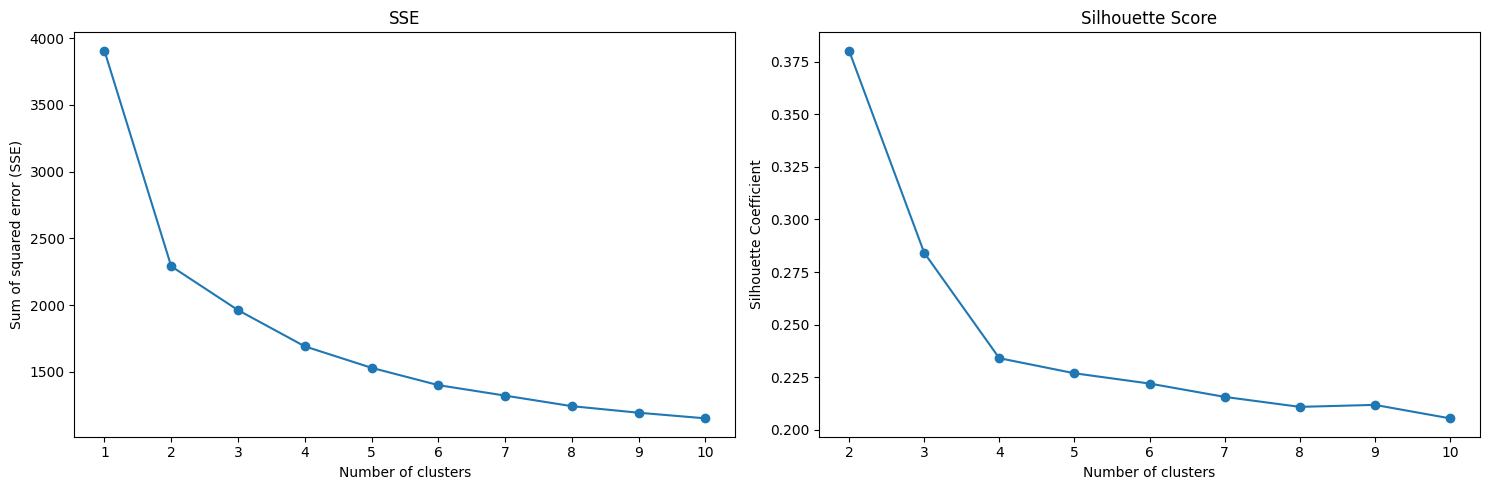

In [ ]:
num_clusters = 10
gwp_sses = kmeans_elbow(X_gwp_train, num_clusters=num_clusters, seed=SEED)
gwp_silhouette_scores = kmeans_silhouette(X_gwp_train, num_clusters=num_clusters, seed=SEED)

plot_side_by_side(
    lambda: plot_cluster_sses(gwp_sses),
    lambda: plot_cluster_silhouettes(gwp_silhouette_scores),
    titles=["SSE", "Silhouette Score"],
)


## Star Clustering

### K-means: Elbow method & Silhouette coefficient
From the plots below:
- "Elbow" point = 2 clusters.
- Highest coefficient point = 2 clusters

Optimum number of clusters for GWP data seems to be 2.


In [42]:
num_clusters = 10
star_sses = kmeans_elbow(X_star_train, num_clusters=num_clusters, seed=SEED)
star_silhouette_scores = kmeans_silhouette(X_star_train, num_clusters=num_clusters, seed=SEED)


In [ ]:
plot_side_by_side(
    lambda: plot_cluster_sses(star_sses),
    lambda: plot_cluster_silhouettes(star_silhouette_scores),
    titles=["SSE", "Silhouette Score"],
)

#### Markdown Question: 
**Question**: Between clustering and classification algorithms, which one performed better for star dataset. Justify your answer.